<a href="https://colab.research.google.com/github/educbd/ML_/blob/main/Lab_3_Part_1_NOED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3 Part 1: Convolutions in Keras
The code below will allow you to play with a single convolutional layer in Keras. Take a look at the documentation for the Conv2D layer, which is also where the original code came from.

---

## **Group Number: 08**

Name  | Student ID
-------------------|------------------
Noushin Asadsamani      | 0829532
Eduardo Chavez Barrientos      | 0828349


---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

In [3]:
input_shape = (4, 28, 28, 3)

x = tf.random.normal(input_shape)

y = Conv2D(filters=2,
           kernel_size=(3, 3),
           strides=1,
           padding='valid',
           input_shape=(None, 28, 28, 3))(x)
y.shape

TensorShape([4, 26, 26, 2])

Here is a brief explanation of the above code:
![An image](https://raw.githubusercontent.com/educbd/ML_/main/Convolution_notebook-2.jpg)



# Exercises
In the code above, make changes to:

```
1. input  ℎ
2. input  𝑤
3. input  𝑛𝑐
4. number of filters
5. kernel size (same as filter size)

```


For each change, calculate the dimensions of the output (y.shape) by hand, including drawing a diagram (as shown below).
![An image](https://raw.githubusercontent.com/educbd/ML_/main/Convolution_notebook-1.jpg)


## **1) Changes to input  ℎ**
```
 - ℎ = 12
```

In [4]:
input_shape = (4, 12, 28, 3)

x = tf.random.normal(input_shape)

y = Conv2D(filters=2,
           kernel_size=(3, 3),
           strides=1,
           padding='valid',
           input_shape=(None, 12, 28, 3))(x)

y.shape

TensorShape([4, 10, 26, 2])

![](https://raw.githubusercontent.com/educbd/ML_/main/h.jpg)

## **2) Changes to input  w**
```
 - w = 20
```

In [5]:
input_shape = (4, 28, 20, 3)

x = tf.random.normal(input_shape)

y = Conv2D(filters=2,
           kernel_size=(3, 3),
           strides=1,
           padding='valid',
           input_shape=(None, 28, 20, 3))(x)
y.shape

TensorShape([4, 26, 18, 2])

![](https://raw.githubusercontent.com/educbd/ML_/main/w.jpg)

## **3) Changes to input  nc**
```
 - nc = 5
```

In [6]:
input_shape = (4, 28, 28, 5)

x = tf.random.normal(input_shape)

y = Conv2D(filters=2,
           kernel_size=(3, 3),
           strides=1,
           padding='valid',
           input_shape=(None, 28, 28, 5))(x)
y.shape

TensorShape([4, 26, 26, 2])

![](https://raw.githubusercontent.com/educbd/ML_/main/nc.jpg)

## **4) Changes to number of filters**
```
 - filters = 3
```

In [7]:
input_shape = (4, 28, 28, 3)

x = tf.random.normal(input_shape)

y = Conv2D(filters=3,
           kernel_size=(3, 3),
           strides=1,
           padding='valid',
           input_shape=(None, 28, 28, 3))(x)
y.shape

TensorShape([4, 26, 26, 3])

![](https://raw.githubusercontent.com/educbd/ML_/main/filters.jpg)

## **5) Changes to kernel size**
```
 - kernel_size = 4
```

In [8]:
input_shape = (4, 28, 28, 3)

x = tf.random.normal(input_shape)

y = Conv2D(filters=2,
           kernel_size=(4, 4),
           strides=1,
           padding='valid',
           input_shape=(None, 28, 28, 3))(x)
y.shape

TensorShape([4, 25, 25, 2])

![](https://raw.githubusercontent.com/educbd/ML_/main/ker.jpg)

## MNIST Revisited

Let's now revisit our MNIST. Knowing that the data contains 2-dimensional images of handwritten digits, we should be able to apply what we've learned about convolutions. Thus, in this section, we will create a convolutional neural network (CNN or convnet) for this data set.

In [9]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
train_data[0].shape

(28, 28)

In [11]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

This time we are going to use a **validation set** to monitor our training progress. We can also use this validation set for *hyperparameter tuning*. Remember, using the validation set allows us to keep the *test set* to gauge how well our final model should do in the real world; that is, the final model only sees the test data once.

In [12]:
# Use the first 10,000 samples of our training data as our validation set
val_data = train_data[:10000]
val_labels = train_labels[:10000]

# Use the remainder of the original training data for actual training
partial_train_data = train_data[10000:]
partial_train_labels = train_labels[10000:]

In [13]:
# Scale the pixel values so they lie in the range of 0-1
partial_train_data = partial_train_data / 255.
val_data = val_data / 255.
test_data = test_data /255.

Note that our data currently has 3 dimensions: `(samples, height, width)`.

In [14]:
print(partial_train_data.shape)
print(val_data.shape)
print(test_data.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


In [15]:
print(partial_train_labels.shape)
print(val_labels.shape)
print(test_labels.shape)

(50000,)
(10000,)
(10000,)


Our convolutional neural network will expect 4-dimensional data: `(batch_size, height, width, channels)`. Note that depending on how you decide to update the parameters of the network, `batch_size` could equal the number of `samples` (as in *batch gradient descent*), or it could equal a single sample (as in *stochastic gradient descent*, or it can equal the batch size (as in *mini-batch gradient descent*).

We can use a NumPy function to add this dimension.

In [16]:
partial_train_data = np.expand_dims(partial_train_data, axis=3)
val_data = np.expand_dims(val_data, axis=3)
test_data = np.expand_dims(test_data, axis=3)

In [17]:
print(partial_train_data.shape)
print(val_data.shape)
print(test_data.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


Note how a fourth dimension was added to our data. This dimension corresponds to the number of channels in our input data. Here it is 1, since the images are all greyscale. It would be 3 if the images were RGB. Also note, that the convention here is *channels last*, as opposed to *channels first*.

As in Lab 1, we need to convert our label data to the correct format.

In [18]:
from tensorflow.keras.utils import to_categorical

partial_train_labels = to_categorical(partial_train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

In [19]:
print(partial_train_labels.shape)
print(val_labels.shape)
print(test_labels.shape)

(50000, 10)
(10000, 10)
(10000, 10)


We will now import the necessary modules for building our convolutional neural network. Since we are using Keras's sequential API we need to import the `Sequential` module. The remaining 3 imports will help us build the layers of our CNN. `Conv2D` creates the convolutional layers we have been discussing in the lectures. `Flatten` is used to create a 1 dimensional vector so we can feed the output of our convolutional layers to the fully-connected layers. We used NumPy's `reshape` function to do this flattening in Lab 1. And the `Dense` layer is the same as what we used in Lab 1.

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

We are going to use a slightly different approach to building our network than we did in Lab 1. Here we will directly add a *list of layers* to the `Sequential()` object. That is, we put all our layers inside square brackets `[...]` and put this inside the `Sequential( [...] )` object to create our model. In Lab 1 we used the `.add()` method to add individual layers to our `Sequential()` object that we initialized without any layers.

In [21]:
model = Sequential([
    Conv2D(filters=32,
           kernel_size=(3, 3),
           strides=1,
           padding='same',
           activation='relu',
           input_shape=(28, 28, 1)),
    Conv2D(filters=32,
           kernel_size=(3, 3),
           strides=2,
           padding='valid',
           activation='relu'),
    Conv2D(filters=64,
           kernel_size=(3, 3),
           strides=1,
           padding='same',
          activation='relu'),
    Conv2D(filters=64,
           kernel_size=(3, 3),
           strides=1,
           padding='valid',
           activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

It is often helpful to see the tensor shapes and number of parameters per layer. We can get this information by using the `.summary()` method.

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 128)               991360    
                                                                 
 dense_1 (Dense)             (None, 10)                1

We are still tackling the same type of problem (multi-class classification) so the same loss and metrics will work for us here. The optimizer `rmsprop` is the same as we used before and can be taken as the default method (or recipe) to try out for updating the model parameters.

In [23]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

We now fit our model to the remaining training data (the original training data minus the validation data). You will now see that *loss* and *accuracy* get updated for each batch of images (here set to 256) but the *validation loss* and *validation accuracy* get updated after each *epoch*. Note that the *validation data* is not being used to train the model. Each batch of the training data is used to update the parameters and then, once we have gone through all of the samples in our training data (that is, all the samples in `partial_train_data`) the model is used to make predictions for the validation set. From those predictions the validation loss and accuracy are calculated.

Each epoch of training should take 30-50s to complete.

In [24]:
history = model.fit(partial_train_data,
                    partial_train_labels,
                    epochs=10,
                    batch_size=256,
                    validation_data=(val_data, val_labels),
                    verbose=1)

Epoch 1/10
196/196 [==============================] - 97s 487ms/step - loss: 0.2930 - accuracy: 0.9094 - val_loss: 0.1231 - val_accuracy: 0.9620
Epoch 2/10
196/196 [==============================] - 95s 485ms/step - loss: 0.0545 - accuracy: 0.9831 - val_loss: 0.0600 - val_accuracy: 0.9832
Epoch 3/10
196/196 [==============================] - 93s 473ms/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.0591 - val_accuracy: 0.9836
Epoch 4/10
196/196 [==============================] - 92s 471ms/step - loss: 0.0209 - accuracy: 0.9937 - val_loss: 0.0552 - val_accuracy: 0.9853
Epoch 5/10
196/196 [==============================] - 93s 473ms/step - loss: 0.0143 - accuracy: 0.9955 - val_loss: 0.0414 - val_accuracy: 0.9892
Epoch 6/10
196/196 [==============================] - 101s 518ms/step - loss: 0.0111 - accuracy: 0.9966 - val_loss: 0.0513 - val_accuracy: 0.9889
Epoch 7/10
196/196 [==============================] - 93s 476ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.0607 - val_a

The values for the training loss and accuracy, as well as the validation loss and accuracy, are stored in the `history` variable. You can see the structure of the dictionary that stores this information as follows:

In [25]:
history.history['loss']

[0.29298728704452515,
 0.05446449667215347,
 0.03215521574020386,
 0.020941007882356644,
 0.014338475652039051,
 0.011105840094387531,
 0.007385065779089928,
 0.005748092662543058,
 0.004963728599250317,
 0.0026979909744113684]

We will now use this information to visualize the progress our network makes on the loss and accuracy as the number of epochs increases.

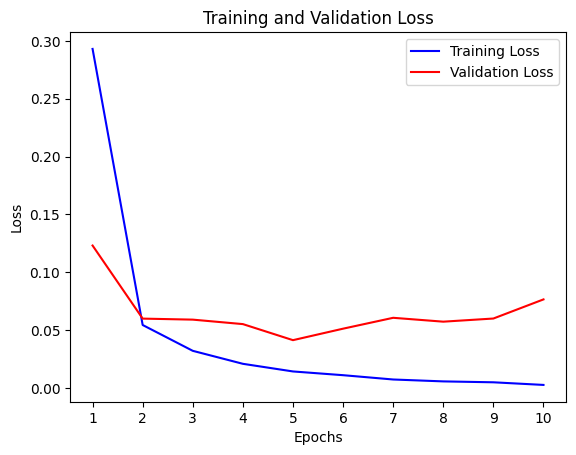

In [26]:
import matplotlib.pyplot as plt  # needed to create our plot

history_dict = history.history # the dictionary that has the information on loss and accuracy per epoch

loss_values = history_dict['loss']   # training loss
val_loss_values = history_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

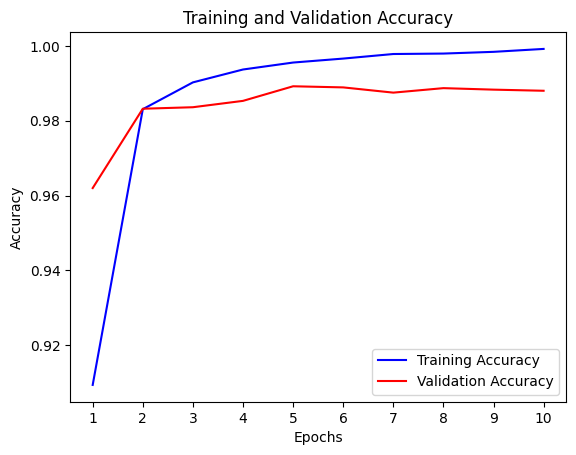

In [27]:
# As above, but this time we want to visualize the training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Exercise: Change the layers

Play around with the **number of filters** and the **filter size** in our model. Note the change in:
- number of parameters in the model
- training and validation losses and accuracies

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

model1 = Sequential([
    Conv2D(filters=4,  # Changing the number of filters
           kernel_size=(4, 4),  # Changing kernel_size to 4 x 4
           strides=1,
           padding='same',
           activation='relu',
           input_shape=(28, 28, 1)),
    Conv2D(filters=78,  # Changing the number of filters
           kernel_size=(3, 3),
           strides=2, # Keeping strides as 2
           padding='valid',
           activation='relu'),
    Conv2D(filters=64,  # Keeping the same number of filters
           kernel_size=(3, 3),
           strides=1,
           padding='same',
           activation='relu'),
    Conv2D(filters=128,  # Changing the number of filters
           kernel_size=(3, 3),
           strides=1,
           padding='valid',
           activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 128)               991360    
                                                                 
 dense_1 (Dense)             (None, 10)                1

In [29]:
model1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
history1 = model1.fit(partial_train_data,
                    partial_train_labels,
                    epochs=5,
                    batch_size=120,
                    validation_data=(val_data, val_labels),
                    verbose=1)

Epoch 1/5
417/417 [==============================] - 171s 408ms/step - loss: 0.1742 - accuracy: 0.9446 - val_loss: 0.0811 - val_accuracy: 0.9773
Epoch 2/5
417/417 [==============================] - 205s 492ms/step - loss: 0.0437 - accuracy: 0.9861 - val_loss: 0.0439 - val_accuracy: 0.9869
Epoch 3/5
417/417 [==============================] - 190s 456ms/step - loss: 0.0253 - accuracy: 0.9916 - val_loss: 0.0422 - val_accuracy: 0.9883
Epoch 4/5
417/417 [==============================] - 167s 401ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0572 - val_accuracy: 0.9850
Epoch 5/5
417/417 [==============================] - 191s 458ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0478 - val_accuracy: 0.9896


In [31]:
history1.history['loss']

[0.17417006194591522,
 0.04366440325975418,
 0.025348415598273277,
 0.01797000877559185,
 0.011704564094543457]

### Exercise: Early Stopping

When you have a final model, train it until the validation loss stops decreasing. At this point, the model will have stopped learning and will start to memorize the training data. The model may be starting to overfit. Note the number of epochs at which this happens.  One way to avoid this overfitting is called *early stopping*.  

Try implementing early stopping for our model:
- use the validation loss plot to determine which epoch corresponds to when the model stops learning
    - if it so happens that the validation loss continues going down for all 10 epochs, then increase the number of epochs in the original code to 20
- use the complete training set (no validation set)
- scale this training set
- expand its dimensions to 4
- use the same model, and same optimizer, loss and metrics
- fit the model to the complete training set (no validation set)
- evaluate the trained model on the test data


In [32]:
# --- Creating the model: ---
model2 = Sequential([
    Conv2D(filters=16,
           kernel_size=(3, 3),
           strides=1,
           padding='same',
           activation='relu',
           input_shape=(28, 28, 1)),
    Conv2D(filters=32,
           kernel_size=(3, 3),
           strides=2,
           padding='valid',
           activation='relu'),
    Conv2D(filters=64,
           kernel_size=(3, 3),
           strides=1,
           padding='same',
           activation='relu'),
    Conv2D(filters=128,
           kernel_size=(3, 3),
           strides=1,
           padding='valid',
           activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# --- Compiling the model: ---
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --- Fitting the model with 20 epochs: ---
history2 = model2.fit(
    partial_train_data,
    partial_train_labels,
    epochs=20,
    batch_size=256,
    verbose=1
)

# --- Evaluate the model: ---
test_loss, test_accuracy = model2.evaluate(test_data, test_labels)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/20
196/196 [==============================] - 125s 633ms/step - loss: 0.2936 - accuracy: 0.9079
Epoch 2/20
196/196 [==============================] - 117s 596ms/step - loss: 0.0548 - accuracy: 0.9833
Epoch 3/20
196/196 [==============================] - 116s 592ms/step - loss: 0.0321 - accuracy: 0.9900
Epoch 4/20
196/196 [==============================] - 134s 686ms/step - loss: 0.0215 - accuracy: 0.9935
Epoch 5/20
196/196 [==============================] - 116s 593ms/step - loss: 0.0153 - accuracy: 0.9954
Epoch 6/20
196/196 [==============================] - 117s 596ms/step - loss: 0.0110 - accuracy: 0.9965
Epoch 7/20
196/196 [==============================] - 115s 589ms/step - loss: 0.0071 - accuracy: 0.9978
Epoch 8/20
196/196 [==============================] - 115s 589ms/step - loss: 0.0070 - accuracy: 0.9979
Epoch 9/20
196/196 [==============================] - 113s 578ms/step - loss: 0.0050 - accuracy: 0.9986
Epoch 10/20
196/196 [==============================] - 115s 585m

In [33]:
history2.history['loss']

[0.2935699224472046,
 0.054826270788908005,
 0.03209441900253296,
 0.02152755856513977,
 0.015311558730900288,
 0.010988724417984486,
 0.007090565282851458,
 0.00699304323643446,
 0.004968180321156979,
 0.0032719075679779053,
 0.0034699649550020695,
 0.002317355712875724,
 0.0024174810387194157,
 0.0019086982356384397,
 0.0016898427857086062,
 0.0010856835870072246,
 0.0025048484094440937,
 0.0021873917430639267,
 0.0017901865066960454,
 0.00028863715124316514]

### Exercise: Early Stopping with Callbacks

Now try to implement early stopping using the Keras [callback](https://keras.io/api/callbacks/early_stopping/) functionality. In this case, you will need to use the validation data, because you want the early stopping to occur as a result of Keras monitoring the validation loss.

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

# --- Create the early stopping callback ---
# This helps stop training if validation loss doesn't improve for 5 consecutive epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# --- Create the neural network model ---
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Conv2D(filters=16,
                                  kernel_size=(3, 3),
                                  strides=1, padding='same',
                                  activation='relu',
                                  input_shape=(28, 28, 1)))
model3.add(tf.keras.layers.Conv2D(filters=32,
                                  kernel_size=(3, 3),
                                  strides=2,
                                  padding='valid',
                                  activation='relu'))
model3.add(tf.keras.layers.Conv2D(filters=64,
                                  kernel_size=(3, 3),
                                  strides=1,
                                  padding='same',
                                  activation='relu'))
model3.add(tf.keras.layers.Conv2D(filters=128,
                                  kernel_size=(3, 3),
                                  strides=1,
                                  padding='valid',
                                  activation='relu'))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(128, activation='relu'))
model3.add(tf.keras.layers.Dense(10, activation='softmax'))


# --- Compile the model ---
model3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --- Fit the model ---
history3 = model3.fit(
    partial_train_data,
    partial_train_labels,
    epochs=20,
    batch_size=256,
    validation_data=(val_data, val_labels),
    callbacks=[callback],
    verbose=1
)

# --- Evaluate the model ---
test_loss, test_accuracy = model3.evaluate(test_data, test_labels)

# Print test loss and accuracy
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/20
196/196 [==============================] - 125s 634ms/step - loss: 0.2912 - accuracy: 0.9112 - val_loss: 0.1767 - val_accuracy: 0.9502
Epoch 2/20
196/196 [==============================] - 127s 647ms/step - loss: 0.0537 - accuracy: 0.9835 - val_loss: 0.0602 - val_accuracy: 0.9808
Epoch 3/20
196/196 [==============================] - 130s 664ms/step - loss: 0.0327 - accuracy: 0.9894 - val_loss: 0.0525 - val_accuracy: 0.9846
Epoch 4/20
196/196 [==============================] - 126s 644ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.0471 - val_accuracy: 0.9871
Epoch 5/20
196/196 [==============================] - 125s 637ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.0506 - val_accuracy: 0.9870
Epoch 6/20
196/196 [==============================] - 125s 639ms/step - loss: 0.0099 - accuracy: 0.9968 - val_loss: 0.0511 - val_accuracy: 0.9884
Epoch 7/20
196/196 [==============================] - 126s 642ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.0450 -

In [41]:
history3.history['loss']

[0.2911742925643921,
 0.05367900803685188,
 0.032745614647865295,
 0.02057040110230446,
 0.014520402997732162,
 0.009916923008859158,
 0.007979131303727627,
 0.004589745309203863,
 0.005153364967554808,
 0.0034938480239361525,
 0.0029549396131187677,
 0.0015183176146820188]

In [27]:
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb